In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
water_data = pd.read_csv('Water Quality Prediction.csv')

### Label Encoder

In [3]:
from sklearn.preprocessing import LabelEncoder

scaler = LabelEncoder()

enc = water_data.select_dtypes(include='object')

for value in enc:
  water_data[value] = scaler.fit_transform(water_data[value])

### Correlation

In [4]:
water_data.corr()['Target'].sort_values(ascending = False)

Target                    1.000000
Turbidity                 0.238197
Copper                    0.224924
Chloride                  0.210885
Manganese                 0.198982
Iron                      0.178797
Fluoride                  0.175637
Nitrate                   0.172976
Odor                      0.163288
Chlorine                  0.149555
Color                     0.134877
Sulfate                   0.131571
Total Dissolved Solids    0.092163
Zinc                      0.083067
Lead                      0.042636
Index                     0.003557
Air Temperature           0.002535
Month                     0.001302
Day                      -0.000284
Conductivity             -0.000476
Source                   -0.000515
Water Temperature        -0.001271
Time of Day              -0.001397
pH                       -0.033083
Name: Target, dtype: float64

In [6]:
water_data = water_data.drop(columns=['Time of Day', 'Air Temperature', 'Water Temperature', 'Source', 'Day', 'Month', 'Conductivity','Lead','Manganese', 'Index'])

In [7]:
water_data.corr()['Target'].sort_values(ascending = False)

Target                    1.000000
Turbidity                 0.238197
Copper                    0.224924
Chloride                  0.210885
Iron                      0.178797
Fluoride                  0.175637
Nitrate                   0.172976
Odor                      0.163288
Chlorine                  0.149555
Color                     0.134877
Sulfate                   0.131571
Total Dissolved Solids    0.092163
Zinc                      0.083067
pH                       -0.033083
Name: Target, dtype: float64

## Visualizing Features For Outliers

In [8]:
x = water_data.drop(['Target'],axis = 1)
y = water_data['Target']

In [9]:
len(x.columns)

13

### Normal Distribution

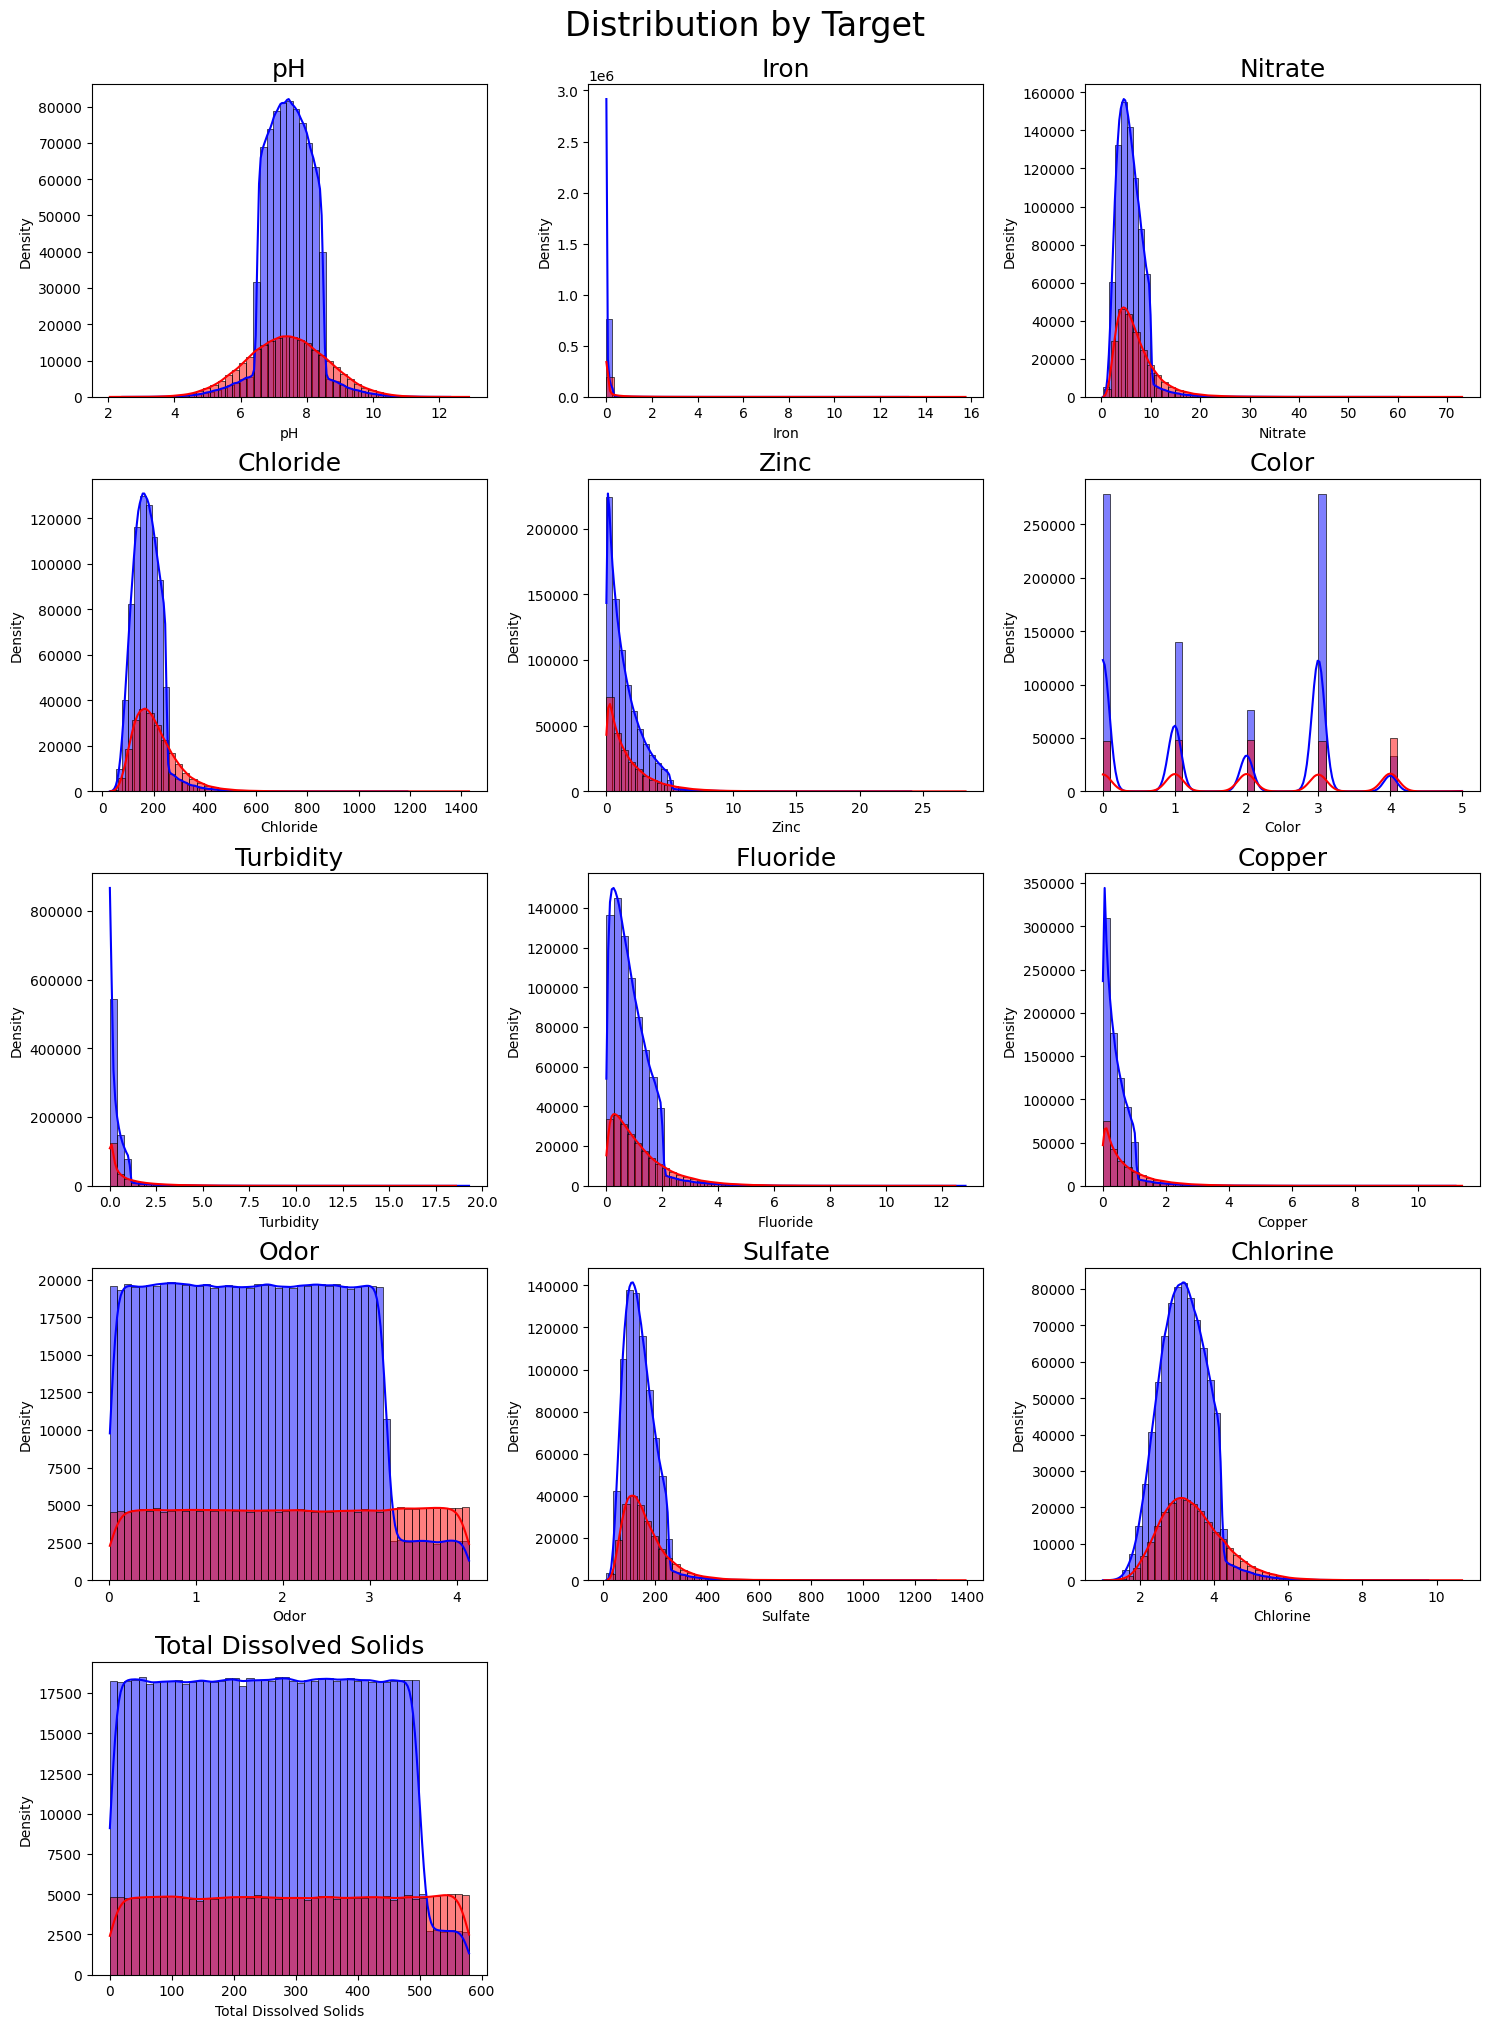

In [10]:
plt.figure(figsize=[15,25])
plt.suptitle("Distribution by Target", fontsize=24, y=0.95)

for i, col in enumerate (x):
    plt.subplot(6,3,i+1)
    sns.histplot(water_data[y==0][col].dropna(), color='blue', label='Not Potable (0)', kde = True, bins =50)
    sns.histplot(water_data[y==1][col].dropna(), color='red', label='Potable (1)', kde = True, bins = 50)
    plt.title(col, fontsize = 18)
    plt.xlabel(col)
    plt.ylabel('Density')
    
plt.tight_layout()
plt.subplots_adjust(top = 0.92)

### IQR

In [11]:
def iqr(column):
    Q1 = x[column].dropna().quantile(0.25)
    Q3 = x[column].dropna().quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

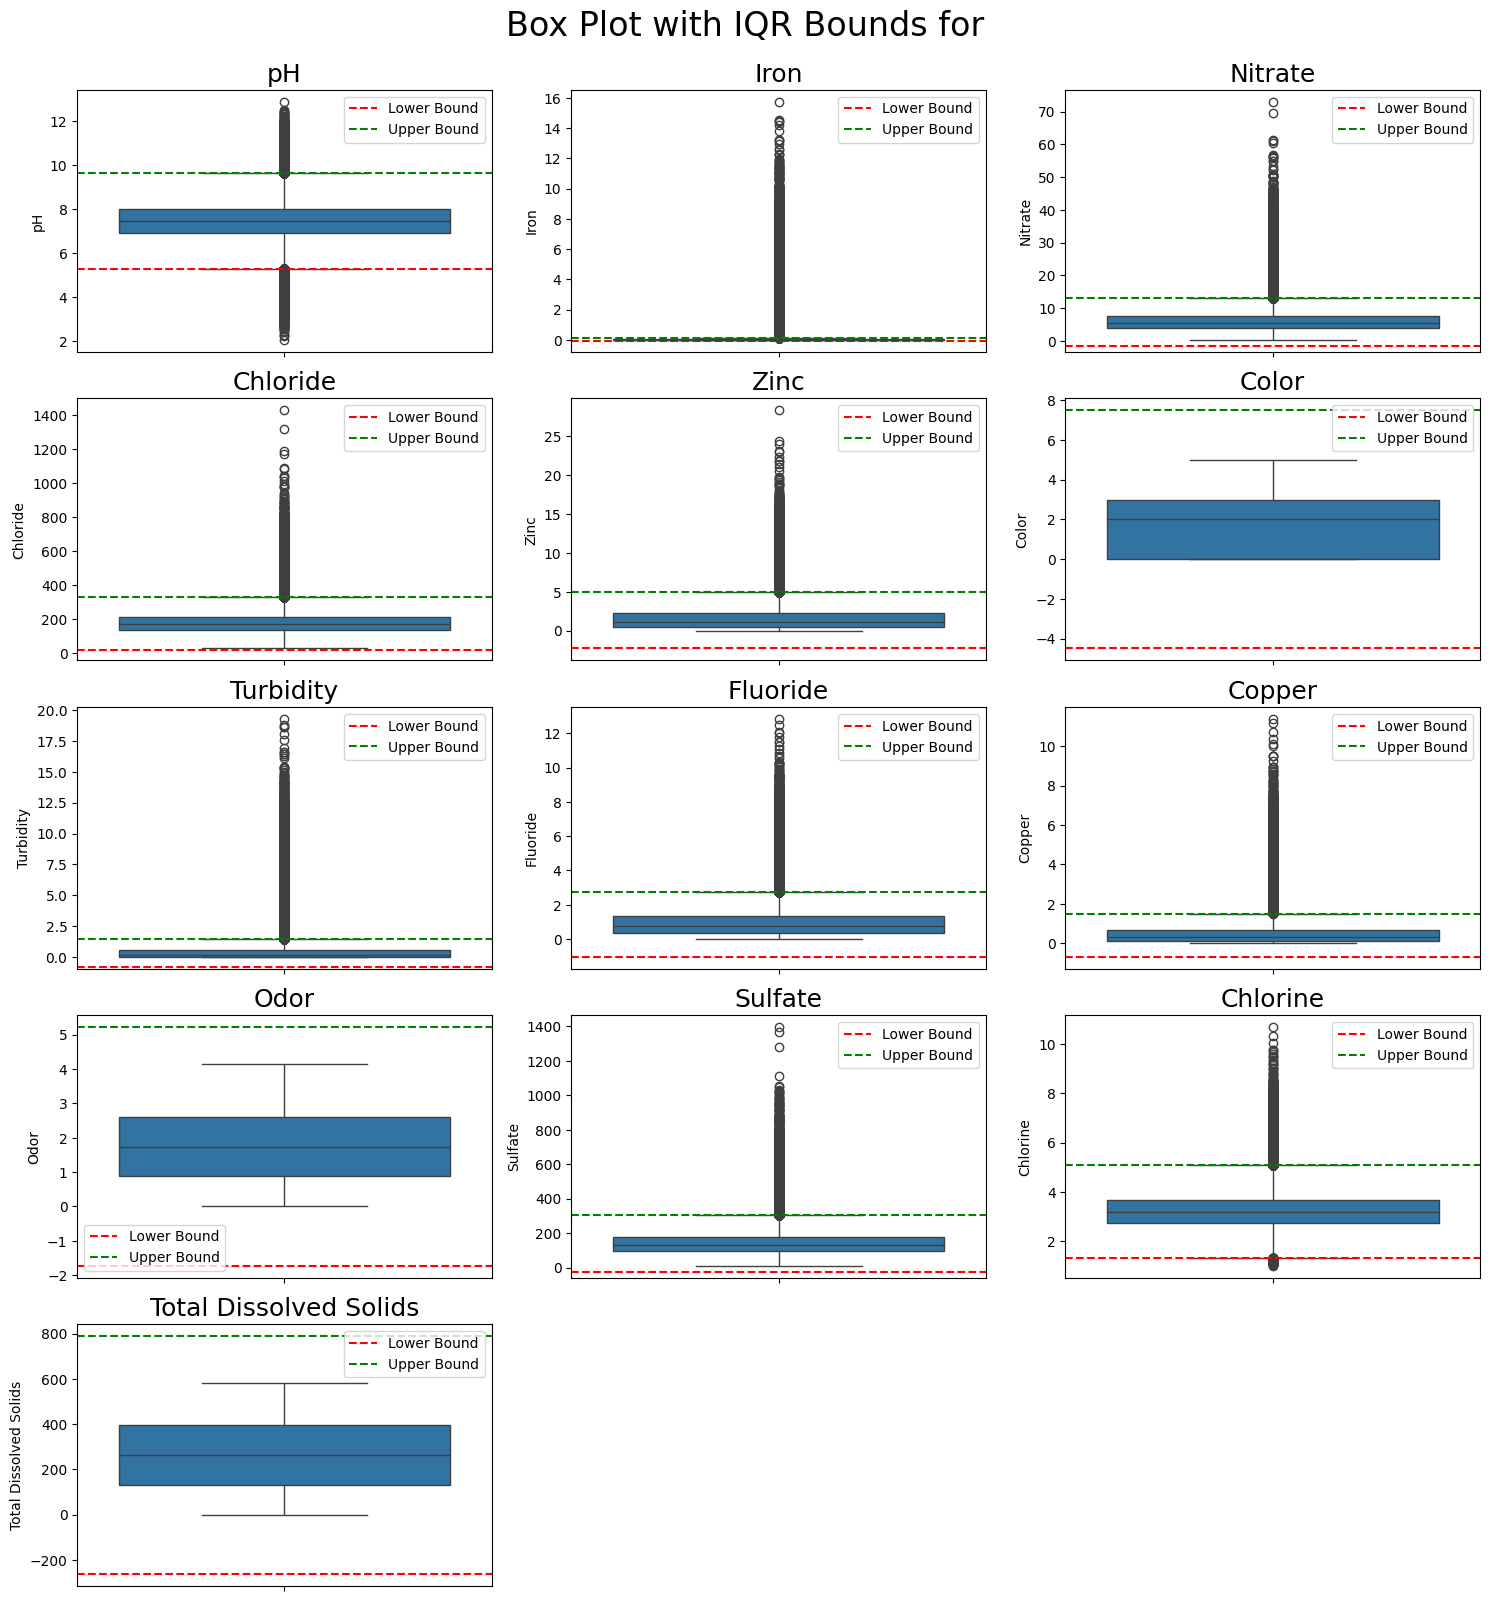

In [12]:
plt.figure(figsize=[15,20])
plt.suptitle("Box Plot with IQR Bounds for", fontsize=24, y=0.95)

for i, col in enumerate(x):
    
    lower_bound, upper_bound = iqr(col)

    plt.subplot(6,3,i+1)
    sns.boxplot(y=x[col])
    plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
    plt.axhline(y=upper_bound, color='g', linestyle='--', label='Upper Bound')
    plt.legend()
    plt.title(col, fontsize=18)

plt.tight_layout()
plt.subplots_adjust(top=0.91)

# Finding Outlier

In [13]:
col_iqr = ['pH', 'Nitrate', 'Chloride', 'Sulfate', 'Chlorine','Iron', 'Zinc', 'Turbidity', 'Fluoride', 'Copper']

In [14]:
colremoved = ['Color','Odor','Total Dissolved Solids']

In [15]:
all_outliers = pd.DataFrame()

## Using IQR

In [16]:
for column in col_iqr:
    Q1 = water_data[column].quantile(0.25)
    Q3 = water_data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = water_data[(water_data[column] < lower_bound) | (water_data[column] > upper_bound)]
    all_outliers = pd.concat([all_outliers, outliers]).drop_duplicates()

    
    print(f"Outliers in {column} based on IQR:")
    print(outliers[column])
    print('______________________________________________')

Outliers in pH based on IQR:
15         10.711226
20          9.686076
99          5.112710
132         5.016008
313         5.214960
             ...    
1048213     4.504630
1048248     4.416812
1048320     9.852359
1048359    10.271204
1048465     5.156081
Name: pH, Length: 26482, dtype: float64
______________________________________________
Outliers in Nitrate based on IQR:
47         18.669380
138        16.445624
314        18.356482
363        15.697153
381        22.114367
             ...    
1048437    19.393585
1048438    17.449678
1048468    16.409682
1048482    19.353002
1048557    15.794161
Name: Nitrate, Length: 30623, dtype: float64
______________________________________________
Outliers in Chloride based on IQR:
100        354.863933
118        337.324585
313        406.165373
533        345.809170
646        408.172053
              ...    
1048225    375.965217
1048276    535.808928
1048328    335.978429
1048356    459.364023
1048465    406.919874
Name: Chloride, Len

In [17]:
all_outliers

,pH,Iron,Nitrate,Chloride,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Total Dissolved Solids,Target
15,10.711226,3.377360e+00,4.068531,230.962920,2.620459,2,0.020148,2.246267,0.040580,4.047238,155.667037,3.415349,523.907933,0
20,9.686076,2.048400e-04,9.588365,240.350234,5.448293,1,0.040746,0.926771,1.194378,2.937562,128.283411,3.338544,270.921435,0
99,5.112710,8.343983e-03,4.877839,168.993681,5.087520,4,0.408679,0.280807,0.395167,3.843564,216.669538,4.390235,209.549036,0
132,5.016008,1.924461e-01,3.395804,NaN,2.675064,4,0.310067,0.886480,0.107726,2.808100,57.589087,2.961321,432.017209,0
313,5.214960,1.590000e-09,4.482665,406.165373,0.028202,0,0.098990,1.141384,0.381092,1.612750,84.759615,2.638975,378.349366,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048264,8.335435,7.220000e-05,2.216892,133.666723,3.318718,1,0.369009,1.178544,2.191226,1.718672,86.286790,4.417746,346.093074,0
1048436,7.763538,2.338138e-03,3.262804,260.206893,1.030311,0,0.844542,NaN,2.151720,NaN,163.902230,3.569110,416.978279,0
1048443,7.648744,NaN,6.242678,251.578185,0.545726,3,0.062380,0.706084,2.181064,0.803539,203.451223,4.455753,479.882016,0
1048508,6.957519,4.050000e-13,6.459705,269.124898,0.052464,0,0.157208,1.464733,1.957032,1.504447,202.787238,2.855122,445.070867,0


In [18]:
outlier_indices = all_outliers.index

In [19]:
cleaned_water_data = water_data[~water_data.index.isin(outlier_indices)]

In [20]:
cleaned_water_data

,pH,Iron,Nitrate,Chloride,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Total Dissolved Solids,Target
0,8.332988,8.350000e-05,8.605777,122.799772,3.434827,0,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,332.118789,0
1,6.917863,8.050000e-05,3.734167,227.029851,1.245317,1,0.019007,0.622874,0.437835,1.686049,144.010981,3.292038,284.641984,0
2,5.443762,2.010586e-02,3.816994,230.995630,0.528280,2,0.319956,0.423423,0.431588,3.414619,275.702107,3.560224,570.054094,0
4,8.091909,2.167128e-03,9.925788,186.540872,3.807511,2,0.004867,0.222912,0.616574,0.795310,175.275175,3.177849,168.075545,0
5,NaN,6.440000e-06,1.702584,162.828458,3.742464,3,0.504791,0.054562,0.851326,1.270483,40.853403,3.957842,365.639045,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,8.186428,1.977157e-02,5.968850,115.963429,2.277221,3,0.020610,1.194165,0.006663,3.149487,43.969084,2.718928,220.571485,0
1048571,8.046225,1.160000e-05,3.678714,148.053168,0.483369,3,0.878835,1.203689,0.171610,0.894528,74.133056,2.312058,406.095969,0
1048572,7.443582,3.103077e-03,7.893399,174.677900,1.461659,3,0.701053,0.115412,0.641379,3.150154,201.977606,3.410297,439.086461,0
1048573,6.897232,6.980000e-10,5.757980,125.564223,0.804589,3,0.156424,0.554729,0.018875,1.997442,204.391754,2.803234,278.051032,0


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [22]:
X = cleaned_water_data.drop('Target', axis = 1)
y = cleaned_water_data['Target']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [24]:
model = RandomForestClassifier()

In [25]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred)

0.9376864434869076

In [29]:
cleaned_water_data.isna().sum()

pH                        13952
Iron                       5531
Nitrate                   13010
Chloride                  21382
Zinc                      19147
Color                         0
Turbidity                  6211
Fluoride                  23031
Copper                    24509
Odor                      21436
Sulfate                   23976
Chlorine                   7050
Total Dissolved Solids      200
Target                        0
dtype: int64

In [30]:
cleaned_water_data['Target'].value_counts()

Target
0    646067
1     78013
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x13db4bfd0>,
 [Text(-1.0375872715734165, 0.36525696963758775, ''),
  Text(1.0375872459250448, -0.3652570424970352, '')])

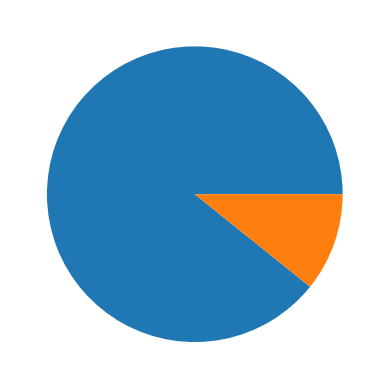

In [31]:
plt.pie(cleaned_water_data['Target'].value_counts())

In [32]:
cleaned_water_data.to_csv('water_data_outlier_cleaned_without_ld_mg.csv', index=False)